In [1]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline

In [3]:
class Person:
    def __init__(self, id, label, data):
        self.id = id
        self.label = label
        self.data = data
    
    def __str__(self):
        return f'Person(id={self.id}, label={self.label}, data={self.data})'

In [4]:
def to_person(file_name) -> Person:
    data = file_name[file_name.find('/')+1 : file_name.rindex('.jpg')].split('_')
    return Person(int(data[0]), int(data[1]), get_image_data(file_name))  

In [5]:
def get_image_data(file_name) -> np.ndarray:
    
    img = cv.imread(file_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (80, 80), interpolation = cv.INTER_AREA)  
    
    #column_vector = np.transpose(resized_img).reshape(resized_img.shape[0] * resized_img.shape[1], 1)
    #column_vector = img.flatten('F')
    
    #return np.float64(column_vector)
    #return column_vector
    return img

In [6]:
def load_dataset(path):
    persons = []
    for file_name in os.listdir(path):
        full_file_path = f'{path}/{file_name}'
        person = to_person(full_file_path)
        persons.append(person)
    persons = sorted(persons, key=lambda person: person.id)       
    return persons

In [7]:
def show_mean_image(images):
    
    X_train_in_column_vector = list()
    
    for image in images:
        X_train_in_column_vector.append(image.flatten('F'))    
    
    train_mean = np.mean([X_train_in_column_vector], axis=1)
    image_reshaped = train_mean.reshape(80,80).T
    plt.imshow(np.asarray(image_reshaped.squeeze()), cmap='gray')
    plt.show() 

Início da implementação.

Carregando as imagens da base ORL + 10 imagens minhas

In [8]:
path = 'ORL'

persons = load_dataset(path)

len(persons)

410

Isolando dados (somente as matrizes das imagens) de treino em X e os targets em y

In [9]:
y = []
X = []
for p in persons:
    X.append(p.data)
    y.append(p.label)

Fazendo o split dos dados.

Como a base contem 10 imagens de cada indivíduo, o for é feito de 10 em 10 unidades.

Ou seja, o split é feito por individuo onde temos um total de 10 dos quais 70% serão treino e 30% teste.

In [10]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()
for i in range(0, len(X), 10):
    person_X = X[i:i+10]
    person_y = y[i:i+10]
    X_train_Person, X_test_Person, y_train_Person, y_test_Person = train_test_split(person_X, person_y, test_size=0.3, random_state=14)
    X_train.extend(X_train_Person)
    X_test.extend(X_test_Person)
    y_train.extend(y_train_Person)
    y_test.extend(y_test_Person)

In [11]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

287 123 287 123


Imagem média

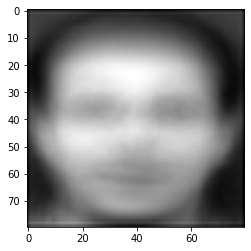

In [12]:
show_mean_image(X_train)

Método que retorna a instancia do algoritmo que será utilizado

In [13]:
def get_model(alg, num_components):
    
    model = None
    
    if alg == 'LBPHFaceRecognizer':   
        model = cv.face.LBPHFaceRecognizer_create(num_components)
    elif alg == 'EigenFaceRecognizer':
        model = cv.face.EigenFaceRecognizer_create(num_components)
        
    return model

O código abaixo executa as seguintes tarefas:

- Percorre a lista de algoritmos
- Faz todos os testes alterando a quantidades de compomente para PCA
- Faz o treinamento do modelo
- Faz as predições
- Calcula a accurácia
- Imprime os resultados (quantidade de componentes vs accurácia)

In [14]:
for alg in ['LBPHFaceRecognizer', 'EigenFaceRecognizer']:
    
    print('Algoritmo: ', alg)  
    print('')   
    
    n_components = list()
    accuracy = list()
    for n_comp in range(1,21):
        
        model = get_model(alg, n_comp)    
        model.train(X_train, np.array(y_train))
        
        pred = list()
        for i, image in enumerate(X_test):
            label, confidence = model.predict(image)
            pred.append(label)

        accur = accuracy_score(pred, y_test)       
        
        n_components.append(n_comp)
        accuracy.append(round(accur*100,2))
        
    for i in range(len(n_components)):
        print('PCA number: {}, accuracy score: {}%'.format(n_components[i], accuracy[i]))
        
    print('-' * 50)      

Algoritmo:  LBPHFaceRecognizer

PCA number: 1, accuracy score: 96.75%
PCA number: 2, accuracy score: 96.75%
PCA number: 3, accuracy score: 96.75%
PCA number: 4, accuracy score: 96.75%
PCA number: 5, accuracy score: 94.31%
PCA number: 6, accuracy score: 95.12%
PCA number: 7, accuracy score: 95.12%
PCA number: 8, accuracy score: 95.12%
PCA number: 9, accuracy score: 94.31%
PCA number: 10, accuracy score: 94.31%
PCA number: 11, accuracy score: 93.5%
PCA number: 12, accuracy score: 94.31%
PCA number: 13, accuracy score: 91.87%
PCA number: 14, accuracy score: 91.87%
PCA number: 15, accuracy score: 93.5%
PCA number: 16, accuracy score: 92.68%
PCA number: 17, accuracy score: 88.62%
PCA number: 18, accuracy score: 87.8%
PCA number: 19, accuracy score: 90.24%
PCA number: 20, accuracy score: 91.06%
--------------------------------------------------
Algoritmo:  EigenFaceRecognizer

PCA number: 1, accuracy score: 12.2%
PCA number: 2, accuracy score: 45.53%
PCA number: 3, accuracy score: 75.61%
PCA

Executando alguns testes...

In [ ]:
model = get_model('LBPHFaceRecognizer', 1)
model.train(X, np.array(y))

me = next((x for x in persons if x.id == 401), None)

label, confidence = model.predict(me.data)

if label == 41:
    print('Yes, its me!')

Algumas referências...

[local binary pattern algorithm the math behind it](https://medium.com/swlh/local-binary-pattern-algorithm-the-math-behind-it-%EF%B8%8F-edf7b0e1c8b3)

[face recognition how lbph works](https://towardsdatascience.com/face-recognition-how-lbph-works-90ec258c3d6)
